Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [84]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPool2D, Flatten, Dense, Dropout, Rescaling,
    RandomRotation, RandomWidth, RandomHeight, RandomZoom,
    RandomFlip, RandomTranslation, RandomContrast, RandomBrightness,BatchNormalization,
)
#from google.colab import drive

In [4]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
#drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#data_dir_train = pathlib.Path("/content/drive/My Drive/Colab Notebooks/MelanomaData/Train")
#data_dir_test = pathlib.Path('/content/drive/My Drive/Colab Notebooks/MelanomaData/Test')
data_dir_train = pathlib.Path("MelanomaData/Train")
data_dir_test = pathlib.Path('MelanomaData/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo

# Create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory= data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    subset="training",
    validation_split=0.2
)

# Print the dataset information
print(train_ds)
print(type(train_ds))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
## shuffle=False is recommended. The validation data is used to evaluate the model performance after each epoch, and you want this to be consistent for reliable performance
# Create the training dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory= data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=False,
    seed=123,
    subset="validation",
    validation_split=0.2
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

Note Iteration :


A tf.data.Dataset can be iterated over like a Python iterable, allowing you to access the images and labels **batch** by batch.
eg, the loop below iterates over train_ds, and for each iteration, it retrieves one batch of data from the dataset.
images and labels:

**images**: This variable holds a **batch** of images. The shape of images is typically (batch_size, height, width, channels). For example, if you have a batch size of 32 and images are resized to 180×180 pixels in RGB format, images will have a shape of (32, 180, 180, 3).You can access an individual image in the batch using indexing. For example, images[0] gives you the first image in the batch.

**labels**: This variable holds the corresponding labels for the batch of images. The shape of labels is usually (batch_size,), containing the integer class indices for each image in the batch. For example, if the batch size is 32, labels will have a shape of (32,).

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

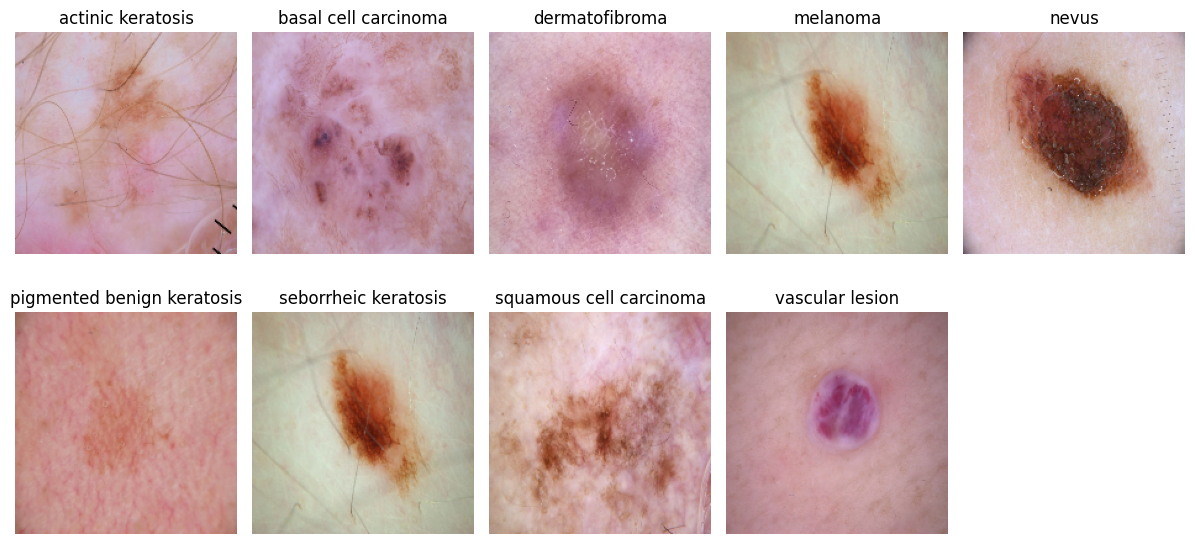

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
fig = plt.figure(figsize=(12, 6))

# Calculate the number of rows and columns for the subplots
num_classes = len(class_names)
num_cols = num_classes // 2  # Integer division for columns
num_rows = 2  # You have 2 rows

# Check if num_classes is odd and add an extra column if needed
if num_classes % 2 != 0:
    num_cols += 1

# Initialize a counter for subplots
plot_count = 1

#display one image from each class
for class_index in range(num_classes):
    for images, labels in train_ds:
        # Get indices where the label corresponds to the specified class
        class_indices = np.where(labels.numpy() == class_index)[0]  # Get all indices for that class

        if class_indices.size > 0:  # Check if there are any images for that class
            # Randomly select one image from the indices
            img_index = np.random.choice(class_indices)
            img = images[img_index]  # Get the image

            # Plot the image
            ax = fig.add_subplot(num_rows, num_cols, plot_count)   # Adjust subplot grid
            plt.imshow(img.numpy().astype("uint8"))  # Convert to numpy and change dtype for display
            plt.title(class_names[class_index])  # Set the title to the class name
            plt.axis('off')  # Turn off the axis
            plot_count += 1
            break  # Break to avoid getting multiple images for one class

# Show the figure
plt.tight_layout()
plt.show()



`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling
num_classes = len(class_names)

model = Sequential()

# Rescaling Layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# First Conv Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))

# Second Conv Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Third Conv Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Fourth Conv Layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Fifth Conv Layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout Layer
model.add(Dropout(0.25))

# Flattening and Dense Layer for Classification
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))



C:\Users\azure\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy for one-hot labels
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 45, 45, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │          69,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,129 (1.06 MB)

 Trainable params: 277,129 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 531ms/step - accuracy: 0.1636 - loss: 2.0904 - val_accuracy: 0.0000e+00 - val_loss: 2.5991
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - accuracy: 0.1918 - loss: 2.0313 - val_accuracy: 0.0380 - val_loss: 2.6326
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 532ms/step - accuracy: 0.2668 - loss: 1.9318 - val_accuracy: 0.1119 - val_loss: 2.4438
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 530ms/step - accuracy: 0.2918 - loss: 1.8765 - val_accuracy: 0.0246 - val_loss: 2.5264
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 529ms/step - accuracy: 0.3208 - loss: 1.8168 - val_accuracy: 0.0537 - val_loss: 2.2867
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 558ms/step - accuracy: 0.3777 - loss: 1.7064 - val_accuracy: 0.0559 - val_loss: 2.2680
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 577ms/step - accuracy: 0.3929 - loss: 1.6761 - val_accuracy: 0.0984 - val_loss: 2.3003
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 545ms/step - accuracy: 0.4212 - loss: 1.5690 - val_

### Visualizing training results

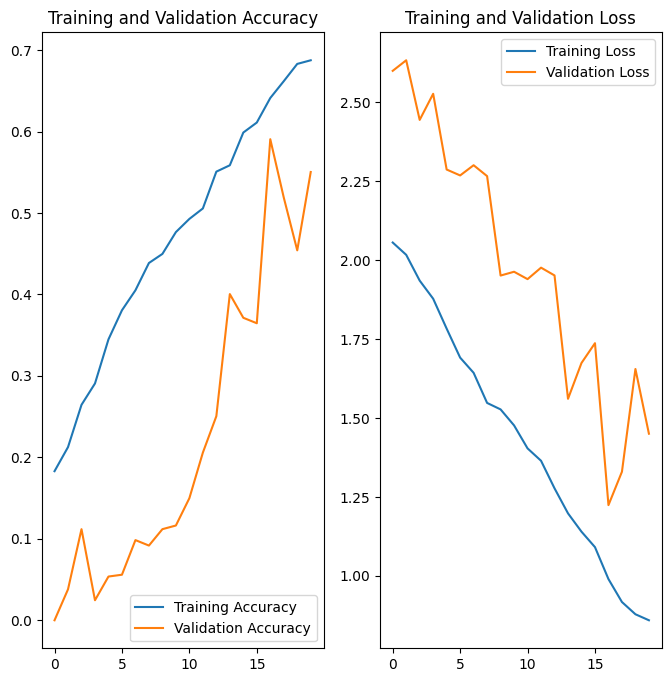

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

**1. Accuracy & Loss Trends (Training Data)**
The model shows a clear improvement in accuracy over the 20 epochs, starting from 16.36% in epoch 1 to 70.26% in epoch 20.
The training loss steadily decreases from 2.0904 to 0.8143, indicating that the model is learning and fitting better to the training data.

**2. Validation Metrics**
Validation accuracy starts at 0.00% in epoch 1, which might indicate either an initial misconfiguration or very poor performance at the beginning. However, it improves significantly, reaching 59.06% by epoch 17 and slightly declining to 55.03% by epoch 20.
Validation loss is somewhat erratic. It starts high at 2.5991 and fluctuates during training. By epoch 17, the validation loss drops to 1.2242, suggesting good model generalization, but it rises again toward the end to 1.4503 in epoch 20.

**3. Overfitting Consideration**
The gap between training accuracy and validation accuracy increases over time. In the final epoch, training accuracy is 70.26% while validation accuracy is 55.03%, indicating the possibility of overfitting. While the model is improving its performance on the training data, its ability to generalize to unseen validation data is less optimal toward the end.
A similar pattern can be seen with the loss values, where the training loss consistently decreases, but validation loss fluctuates and slightly increases toward the end.

**4. Performance Highlights**
There is a sharp improvement in validation accuracy in epochs 14 to 17 (jumping from 25.06% to 59.06%), with the validation loss decreasing correspondingly from 1.9514 to 1.2242.
However, the final few epochs show a slight dip in validation accuracy and an increase in loss, which might suggest that the model has started to overfit or needs some fine-tuning.

In [11]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(  
    rotation_range=45,            
    width_shift_range=0.3,        
    height_shift_range=0.3,       
    shear_range=0.3,              
    zoom_range=0.3,               
    horizontal_flip=True,         
    vertical_flip=True,           
    fill_mode='reflect',          
    brightness_range=[0.5, 1.5]   
) 


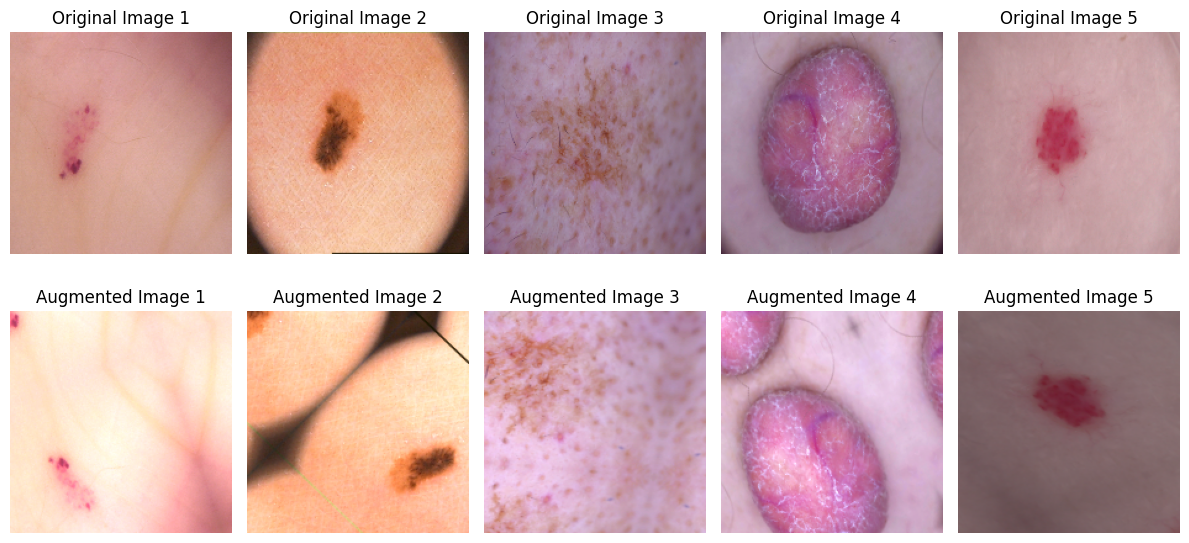

In [35]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

def visualize_train_dataset(train_ds, data_gen, num_images=5):
    # Create a figure to display images
    plt.figure(figsize=(12, 6))

    # Get a batch of images from the dataset
    for images, labels in train_ds.take(1):  # Take one batch
        original_images = images.numpy()  # Convert to NumPy array

        # Display original images
        for i in range(num_images):
            plt.subplot(2, num_images, i + 1)
            plt.imshow(original_images[i].astype('uint8'))
            plt.title("Original Image {}".format(i + 1))
            plt.axis('off')

            # Generate augmented image
            augmented_image = data_gen.random_transform(original_images[i])  # Apply data augmentation

            # Display augmented images
            plt.subplot(2, num_images, i + 1 + num_images)
            plt.imshow(augmented_image.astype('uint8'))
            plt.title("Augmented Image {}".format(i + 1))
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
visualize_train_dataset(train_ds, data_gen)

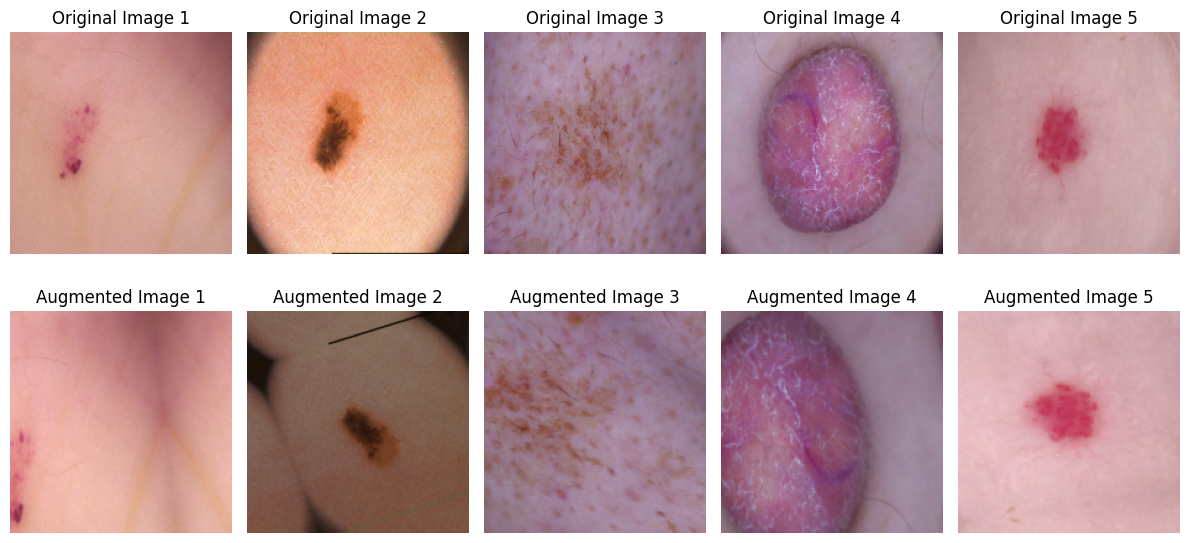

In [36]:
#try another augmentation
datagen = ImageDataGenerator(
    rotation_range=20,           # Randomly rotate images by 0 to 20 degrees
    width_shift_range=0.2,       # Randomly translate images horizontally (20% of width)
    height_shift_range=0.2,      # Randomly translate images vertically (20% of height)
    shear_range=0.2,             # Randomly apply shear transformations
    zoom_range=0.2,              # Randomly zoom in/out on images
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='reflect'          # Fill pixels after augmentation
)

visualize_train_dataset(train_ds, data_gen)

### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

##train_gen = data_gen.flow(train_ds, batch_size=batch_size)
##flow doesnt work on tensor ds but on numpy..so applying layers instead

# Define the model
model = Sequential()

model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Data Augmentation Layers
model.add(RandomFlip("horizontal"))  # Randomly flip images horizontally
model.add(RandomRotation(0.2))  # Randomly rotate images by up to 20%
model.add(RandomTranslation(0.2, 0.2))  # Randomly translate images horizontally and vertically by up to 20%
model.add(RandomZoom(0.2))  # Randomly zoom in/out on images
model.add(RandomContrast(0.2))  # Randomly change the contrast
model.add(RandomBrightness(0.2))  # Optional: Randomly change brightness



# First Conv Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Dropout(0.25))  # Dropout after first Conv layer

# Second Conv Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout after second Conv layer

# Third Conv Layer
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout after third Conv layer

# Fourth Conv Layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout after fourth Conv layer

# Fifth Conv Layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout after fifth Conv layer

# Flattening and Dense Layer for Classification
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Optional Dense layer before the output layer
model.add(Dropout(0.5))  # Dropout before the output layer
model.add(Dense(num_classes, activation="softmax"))





### Compiling the model

In [18]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics=['accuracy'])

### Training the model

In [19]:
## Your code goes here, note: train your model for 20 epochs
# Train the model with augmented images
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 354ms/step - accuracy: 0.1462 - loss: 4.2635 - val_accuracy: 0.0000e+00 - val_loss: 2.6344
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.1867 - loss: 2.0935 - val_accuracy: 0.1119 - val_loss: 2.5262
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 343ms/step - accuracy: 0.1882 - loss: 2.0359 - val_accuracy: 0.1119 - val_loss: 2.5555
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 342ms/step - accuracy: 0.1990 - loss: 2.0428 - val_accuracy: 0.0000e+00 - val_loss: 2.6585
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 343ms/step - accuracy: 0.1965 - loss: 2.0289 - val_accuracy: 0.1119 - val_loss: 2.5671
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.1985 - loss: 2.0314 - val_accuracy: 0.1119 - val_loss: 2.5339
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 343ms/step - accuracy: 0.1998 - loss: 2.0322 - val_accuracy: 0.1119 - val_loss: 2.6102
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 341ms/step - accuracy: 0.2070 - loss: 2.0493 - 

### Visualizing the results

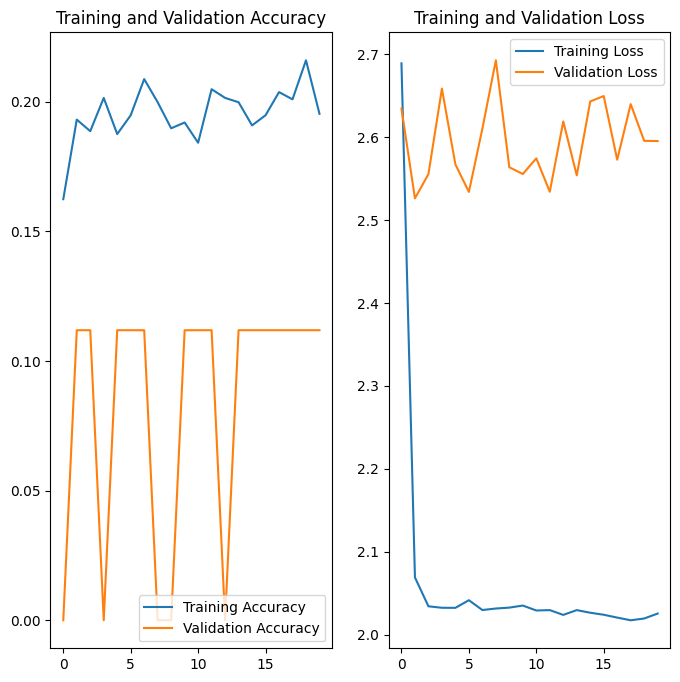

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings:
Training Accuracy:

Starts very low (14.62% in Epoch 1) and improves very slightly, peaking at 22.00% by Epoch 19.
Indicates the model is struggling to learn meaningful patterns, likely due to several issues with the training process or the architecture.
Validation Accuracy:

Stuck at 11.19% for nearly the entire duration, which could mean the model is overfitting to the training data and not generalizing well to the validation data.
Validation loss does not improve, further supporting the idea that the model has high variance.
Loss Behavior:

The training loss decreases somewhat (from 4.26 to 2.00), but the validation loss remains high (fluctuating between 2.5 and 2.7), suggesting a gap between training and validation performance (overfitting).
Augmentation Effect:

It appears that the augmentations might be too strong or irrelevant to the data. Aggressive transformations such as large rotations, zooms, or changes in contrast could result in unrealistic images, making it harder for the model to learn.

In [22]:
# Define the model
model = Sequential()

# Rescale input data
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Data Augmentation Layers (less aggressive)
model.add(RandomFlip("horizontal"))  # Randomly flip images horizontally
model.add(RandomRotation(0.1))  # Reduce rotation range to 10%
model.add(RandomTranslation(0.1, 0.1))  # Reduce translation to 10%
model.add(RandomZoom(0.1))  # Reduce zoom range
model.add(RandomContrast(0.1))  # Less contrast adjustment
# Remove brightness to reduce augmentation complexity

# First Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))  # Smaller kernel
model.add(Dropout(0.2))  # Reduced Dropout rate

# Second Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))  # Smaller kernel
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # Reduced Dropout rate

# Third Conv Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))  # More filters
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Slightly higher dropout for deeper layers

# Fourth Conv Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening and Dense Layer for Classification
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))  # Final dropout slightly reduced
model.add(Dense(num_classes, activation="softmax"))


In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

In [27]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.5107 - loss: 1.3831 - val_accuracy: 0.2729 - val_loss: 1.7746
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 256ms/step - accuracy: 0.5036 - loss: 1.3963 - val_accuracy: 0.3535 - val_loss: 1.5393
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - accuracy: 0.5224 - loss: 1.4148 - val_accuracy: 0.2796 - val_loss: 2.0865
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 247ms/step - accuracy: 0.5094 - loss: 1.3751 - val_accuracy: 0.2752 - val_loss: 2.0560
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - accuracy: 0.5019 - loss: 1.4348 - val_accuracy: 0.3199 - val_loss: 1.6522
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - accuracy: 0.5411 - loss: 1.3137 - val_accuracy: 0.2796 - val_loss: 2.2110
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - accuracy: 0.5220 - loss: 1.3586 - val_accuracy: 0.3333 - val_loss: 1.6172
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - accuracy: 0.5275 - loss: 1.3451 - val_accu

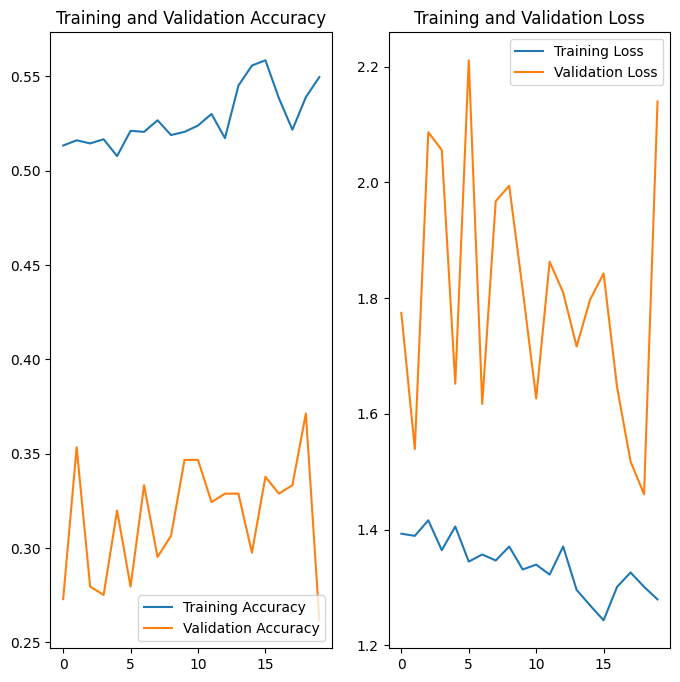

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings,
Not much improvement, lets try without any augmentation, same code

In [29]:
# Define the model
model = Sequential()

# Rescale input data
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Data Augmentation Layers (less aggressive)
#model.add(RandomFlip("horizontal"))  # Randomly flip images horizontally
#model.add(RandomRotation(0.1))  # Reduce rotation range to 10%
#model.add(RandomTranslation(0.1, 0.1))  # Reduce translation to 10%
#model.add(RandomZoom(0.1))  # Reduce zoom range
#model.add(RandomContrast(0.1))  # Less contrast adjustment
# Remove brightness to reduce augmentation complexity

# First Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))  # Smaller kernel
model.add(Dropout(0.2))  # Reduced Dropout rate

# Second Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))  # Smaller kernel
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # Reduced Dropout rate

# Third Conv Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))  # More filters
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Slightly higher dropout for deeper layers

# Fourth Conv Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening and Dense Layer for Classification
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))  # Final dropout slightly reduced
model.add(Dense(num_classes, activation="softmax"))


In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

In [31]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - accuracy: 0.1728 - loss: 2.8122 - val_accuracy: 0.1119 - val_loss: 2.3305
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 224ms/step - accuracy: 0.2025 - loss: 2.0526 - val_accuracy: 0.1119 - val_loss: 2.3239
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 224ms/step - accuracy: 0.2035 - loss: 2.0420 - val_accuracy: 0.1119 - val_loss: 2.4091
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.2026 - loss: 2.0352 - val_accuracy: 0.1119 - val_loss: 2.4439
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.1754 - loss: 2.0306 - val_accuracy: 0.1119 - val_loss: 2.4349
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - accuracy: 0.2041 - loss: 1.9997 - val_accuracy: 0.0671 - val_loss: 2.5470
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 224ms/step - accuracy: 0.2891 - loss: 1.8820 - val_accuracy: 0.0224 - val_loss: 2.5124
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.3507 - loss: 1.7609 - val_accu

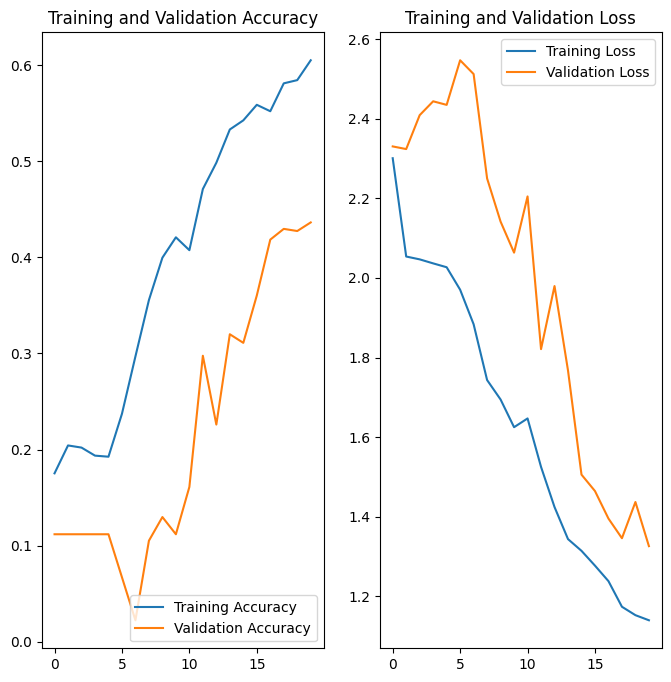

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Here’s an analysis of the different training scenarios based on  results:

#### **1. Without Data Augmentation, One Dropout Layer**
- **Epoch 1 to 5:** Training accuracy starts at 16.36% and improves steadily to around 32%. However, validation accuracy remains low in the early epochs (0%, 3.8%, 11.19%), and the validation loss fluctuates.
- **Epoch 14 onwards:** Training accuracy reaches 60%+, but validation accuracy also improves significantly to 59.06%, showing that the model is learning to generalize better.
- **Validation Loss:** The validation loss decreases sharply from epochs 14–17, indicating better generalization during later training stages, but it starts rising slightly towards the end.

**Inference:**
- The model begins to generalize better after several epochs, as evidenced by the rising validation accuracy and stabilizing validation loss.
- Despite no data augmentation, the model shows good improvement in training and validation metrics over time.
  
#### **2. With Data Augmentation and Multiple Dropout Layers**
- **Epoch 1 to 6:** The accuracy starts lower (18.24%) and grows very slowly, reaching only 21% by epoch 6. Validation accuracy remains low and sometimes even drops to 0%.
- **Epoch 14 to 20:** Training accuracy improves slowly and reaches 37.32%, but validation accuracy remains erratic and does not improve significantly, hovering around 10–11%.
- **Validation Loss:** The validation loss does not decrease as much as in the first case and fluctuates at higher values throughout, suggesting poor generalization.

**Inference:**
- The model struggles to generalize and learn effectively with data augmentation and multiple dropouts. The high dropout rate might be affecting the model’s ability to learn useful patterns, or the augmentation strategy might not be appropriate for the dataset.
- The validation accuracy remains stuck, and the validation loss is high, indicating possible underfitting.
  
#### **3. Without Data Augmentation, Reduced Dropout Rate**
- **Epoch 1 to 6:** The training accuracy starts at 17.28% and improves steadily. Validation accuracy stays around 11% but shows improvement at epoch 7 onwards.
- **Epoch 12 to 20:** Training accuracy rises rapidly and reaches around 60% by epoch 20. Validation accuracy also significantly improves from 11% (early) to 43.62% by epoch 20.
- **Validation Loss:** The validation loss consistently decreases after epoch 11, especially after epoch 15, indicating strong generalization.

**Inference:**
- The reduced dropout rate seems to strike a better balance between regularization and learning. The model shows better convergence, with validation accuracy improving consistently and validation loss dropping.
- This setup outperforms the scenario with data augmentation, showing the model can generalize well even without augmentation.

### **Key Takeaways:**
1. **Data Augmentation + High Dropout** resulted in worse performance, potentially due to too much regularization or incorrect augmentation strategies.
2. **No Data Augmentation + Lower Dropout** achieved the best validation performance, suggesting that the model is learning effectively with some regularization but not too much.
3. **No Augmentation + One Dropout Layer** also performed well, though with a bit of fluctuation in validation loss towards the end, indicating potential overfitting.

#### Next Steps:
- To improve performance, can experiment with **lighter data augmentation** or **different dropout rates**.
- **Tuning learning rate** could help in stabilizing the training process.

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [38]:
for image, label in train_ds:
    label = label.numpy()  # Convert the label to a numpy array
    print(f"Label: {label}, Shape: {label.shape}")  # Print the label and its shape
    break  # Remove this break to print all labels; for now, it just prints the first one


Label: [5 4 4 4 8 8 5 5 5 8 3 4 7 4 3 5 0 8 3 1 2 4 5 3 7 4 5 4 7 4 1 5], Shape: (32,)


In [40]:

# Initialize an empty list to store all labels
all_labels = []

# Iterate over the dataset and collect all labels
for images, labels in train_ds:
    all_labels.append(labels.numpy())  # Convert labels to numpy arrays and append to the list

# Concatenate all label arrays into a single array
all_labels = np.concatenate(all_labels)

# Use np.unique to get unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)

# Create a dictionary to display the results
class_counts = dict(zip(unique_labels, counts))

print(class_counts)



{0: 92, 1: 309, 2: 77, 3: 352, 4: 277, 5: 370, 6: 58, 7: 142, 8: 115}


In [41]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

 **Todo:** Write your findings here:
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


#### **There is a notable imbalance in the number of samples per class:**

**Underrepresented Classes:**
Actinic Keratosis (92) and Seborrheic Keratosis (58) have significantly fewer samples compared to other classes. This could affect the model's ability to generalize well for these classes.

**Overrepresented Classes:**
Pigmented Benign Keratosis (370) and Melanoma (352) have a higher number of samples. This may lead the model to be biased toward these classes during training.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [42]:
!pip install Augmentor

     ---------------------------------------- 78.4/78.4 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [70]:
path_to_training_dataset="MelanomaData/Train"
import Augmentor
print(class_names)
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Initialised with 114 image(s) found.
Output directory set to MelanomaData/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2296E03D5D0>: 100%|█| 500/500 [00:01<00:00, 268.19 Samples


Initialised with 376 image(s) found.
Output directory set to MelanomaData/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2296E316A90>: 100%|█| 500/500 [00:01<00:00, 282.70 Samples


Initialised with 95 image(s) found.
Output directory set to MelanomaData/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2285836C750>: 100%|█| 500/500 [00:01<00:00, 274.32 Samples


Initialised with 438 image(s) found.
Output directory set to MelanomaData/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x22844832F50>: 100%|█| 500/500 [00:09<00:00, 54.28 Sample


Initialised with 357 image(s) found.
Output directory set to MelanomaData/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=796x682 at 0x22844495110>: 100%|█| 500/500 [00:08<00:00, 58.72 Samples/


Initialised with 462 image(s) found.
Output directory set to MelanomaData/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x228441E50D0>: 100%|█| 500/500 [00:01<00:00, 277.49 Samples


Initialised with 77 image(s) found.
Output directory set to MelanomaData/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22842F71C10>: 100%|█| 500/500 [00:04<00:00, 123.30 Sample


Initialised with 181 image(s) found.
Output directory set to MelanomaData/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2296E4E8DD0>: 100%|█| 500/500 [00:01<00:00, 274.35 Samples


Initialised with 139 image(s) found.
Output directory set to MelanomaData/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2284010C490>: 100%|█| 500/500 [00:01<00:00, 272.37 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [71]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [72]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['MelanomaData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6512858c-b718-4a03-8172-0ed6161cb118.jpg',
 'MelanomaData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_750e90fa-99b1-4335-80fd-92cba74ff2c1.jpg',
 'MelanomaData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b54f09de-a0dd-46c0-8895-4a02d1d4b717.jpg',
 'MelanomaData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_fbb4c0fb-6dff-497c-8587-2214a8ec5104.jpg',
 'MelanomaData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_fc85dedb-1d72-435a-ad2a-db8686afe91d.jpg',
 'MelanomaData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_2c38577e-6a61-4d40-99ee-258414c19d8d.jpg',
 'MelanomaData\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_ea01913b-23fc-47e4-9ef2-455bce5d990f.jpg',
 'MelanomaData\\Train\\actinic keratosis\

In [73]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [74]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [75]:
#original_images = list(class_path.glob('*.jpg')):
#This line scans the directory specified by class_path and collects all the .jpg files into a list called original_images.
#It gives paths to all the images in that directory for that specific class.
#original_data.extend([(str(img), class_name) for img in original_images]):
#This line takes the original_images list and creates tuples of image paths and their corresponding class name.
#It then extends the original_data list with these tuples.



# Initialize a list to hold paths and labels
original_data = []
augmented_data = []

# Loop through class names to gather original images
for class_name in class_names:
    class_path = data_dir_train / class_name
    
    # List original images
    original_images = list(class_path.glob('*.jpg')) 
    original_data.extend([(str(img), class_name) for img in original_images])

# Create DataFrame for original images
original_df = pd.DataFrame(original_data, columns=['Path', 'Label'])

# Loop through class names to gather augmented images
for class_name in class_names:
    class_path = data_dir_train / class_name / 'output'  # Output directory for Augmentor
    
    if class_path.exists():
        augmented_images = list(class_path.glob('*.jpg'))
        augmented_data.extend([(str(img), class_name) for img in augmented_images])

# Create DataFrame for augmented images
augmented_df = pd.DataFrame(augmented_data, columns=['Path', 'Label'])

# Combine original and augmented DataFrames
combined_df = pd.concat([original_df, augmented_df], ignore_index=True)

# Count the distribution of labels
class_distribution = combined_df['Label'].value_counts()
print(class_distribution)


Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### NOTE -  keras.utils.image_dataset_from_directory 

#### directory: Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.

In [76]:
##### So lets combine train and augmented images to a combine directory first
import shutil

# Create a new combined directory
combined_dir = "MelanomaData/Combined"
original_dir = "MelanomaData/Train"

# Create combined directory if it doesn't exist
os.makedirs(combined_dir, exist_ok=True)

# Copy both original and augmented images to combined directory
for class_name in class_names:
    # Create class directory in combined folder
    combined_class_dir = os.path.join(combined_dir, class_name)
    os.makedirs(combined_class_dir, exist_ok=True)
    
    # Path to original class directory
    original_class_dir = os.path.join(original_dir, class_name)
    
    # Copy original images
    for img in os.listdir(original_class_dir):
        if img != 'output':  # Skip the output folder
            src = os.path.join(original_class_dir, img)
            dst = os.path.join(combined_class_dir, img)
            shutil.copy2(src, dst)
    
    # Copy augmented images
    augmented_dir = os.path.join(original_class_dir, 'output')
    if os.path.exists(augmented_dir):
        for img in os.listdir(augmented_dir):
            src = os.path.join(augmented_dir, img)
            dst = os.path.join(combined_class_dir, f'aug_{img}')
            shutil.copy2(src, dst)

In [79]:
for class_name in class_names:
    combined_path = os.path.join("MelanomaData/Combined", class_name)
    if os.path.exists(combined_path):
        count = 0
        for file in os.listdir(combined_path):
            count += 1
    print(f"{class_name} (combined): {count} images")

actinic keratosis (combined): 614 images
basal cell carcinoma (combined): 876 images
dermatofibroma (combined): 595 images
melanoma (combined): 938 images
nevus (combined): 857 images
pigmented benign keratosis (combined): 962 images
seborrheic keratosis (combined): 577 images
squamous cell carcinoma (combined): 681 images
vascular lesion (combined): 639 images


#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [81]:
data_dir_train = pathlib.Path("MelanomaData/Combined")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [83]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [87]:
# Define the model
model = Sequential()

# Rescale input data
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# First Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))  # Smaller kernel
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.2))  # Dropout

# Second Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))  # Smaller kernel
model.add(BatchNormalization())  # Add Batch Normalization
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # Dropout

# Third Conv Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))  # More filters
model.add(BatchNormalization())  # Add Batch Normalization
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Slightly higher dropout for deeper layers

# Fourth Conv Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening and Dense Layer for Classification
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.4))  # Final dropout slightly reduced
model.add(Dense(num_classes, activation="softmax"))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [88]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

In [89]:
# View the summary of all layers
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 4,033,065 (15.38 MB)

 Trainable params: 4,032,425 (15.38 MB)

 Non-trainable params: 640 (2.50 KB)

#### **Todo:**  Train your model

In [90]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 467ms/step - accuracy: 0.3313 - loss: 2.0735 - val_accuracy: 0.0000e+00 - val_loss: 3.3004
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 77s 452ms/step - accuracy: 0.4456 - loss: 1.5241 - val_accuracy: 0.0393 - val_loss: 2.4661
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 77s 453ms/step - accuracy: 0.5543 - loss: 1.2433 - val_accuracy: 0.3526 - val_loss: 3.0296
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 450ms/step - accuracy: 0.6091 - loss: 1.0810 - val_accuracy: 0.3742 - val_loss: 2.9396
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 452ms/step - accuracy: 0.6159 - loss: 1.0447 - val_accuracy: 0.3890 - val_loss: 1.7155
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 78s 459ms/step - accuracy: 0.6778 - loss: 0.8825 - val_accuracy: 0.7231 - val_loss: 0.8119
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 77s 457ms/step - accuracy: 0.7243 - loss: 0.7854 - val_accuracy: 0.6258 - val_loss: 1.6007
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 77s 453ms/step - accuracy: 0.7653 - los

#### **Todo:**  Visualize the model results

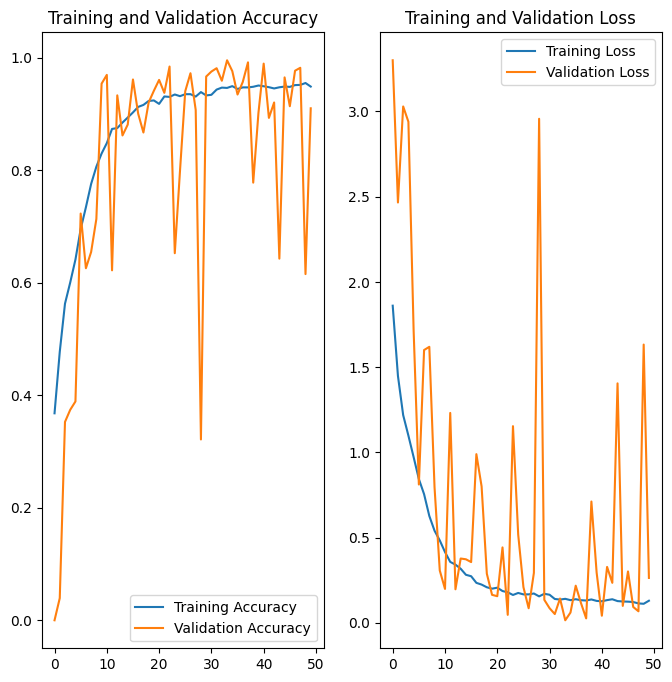

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Corrected Class Imbalance & Added Batch Normalization (50 Epochs):

This configuration appears to yield the best results. Starting accuracy was 33.13% and climbed significantly.
By epoch 6, the model achieved 67.78% accuracy with a high validation accuracy of 72.31%, indicating strong performance and potentially good generalization.

**Observations & Recommendations**
1) Dropout Strategy: It seems that using fewer dropout layers (or lower dropout rates) yielded better results, especially when combined with batch normalization.

2) Data Augmentation: While augmentation can enhance robustness, it's crucial to balance the complexity it introduces. need to consider simpler augmentations or using a smaller augmentation range.

3) Class Imbalance: Addressing class imbalance seems to have had a positive impact. 

4) Batch Normalization: This addition is showing promise. It can help stabilize learning and improve convergence. 

5) Validation Performance: Always keep an eye on validation accuracy and loss. sometimes validation performance plateaus or starts to degrade, it might be a sign to adjust learning rates, reconsider augmentation strategies, or refine your model architecture.